<a href="https://colab.research.google.com/github/AfsanehHabibi/reddit-conversation-quality/blob/main/Conversation_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/University/RedditData/"

In [4]:
import pickle

with open(f"{base_path}conversations_with_features_dataframe.pkl", 'rb') as file:
    df = pickle.load(file)

In [5]:
df = df.rename(columns={'politensess': 'politeness'})

In [6]:
df.head()

,id,conversation_id,reply_to,readability,evidence,has_reasoning,politeness,relatedness,subjectivity,polarity,new_readability,norm_readability,norm_politeness
0,xyt38s,xyt38s,None,-0.5,0.5,0,0.095238,NaN,0.532381,0.224286,-0.5,0.95,0.117647
1,iromk5a,xyt38s,xyt38s,-0.5,0.5,0,0.095238,0.887727,0.532381,0.224286,-0.5,0.95,0.117647
2,irpc624,xyt38s,xyt38s,-4.5,0.5,0,0.000000,0.031587,0.000000,0.000000,-4.5,0.55,0.000000
3,irp3pvs,xyt38s,xyt38s,-5.5,0.0,0,0.047619,0.000000,0.400000,0.800000,-5.5,0.45,0.058824
4,xyt38b,xyt38b,None,-2.5,0.5,1,0.380952,NaN,0.415179,0.015476,-2.5,0.75,0.470588


Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 135904


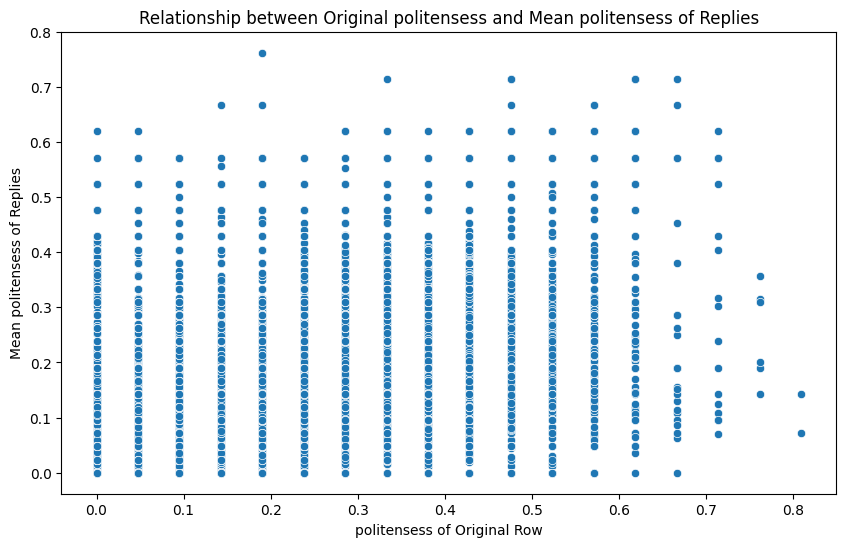

Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 116376


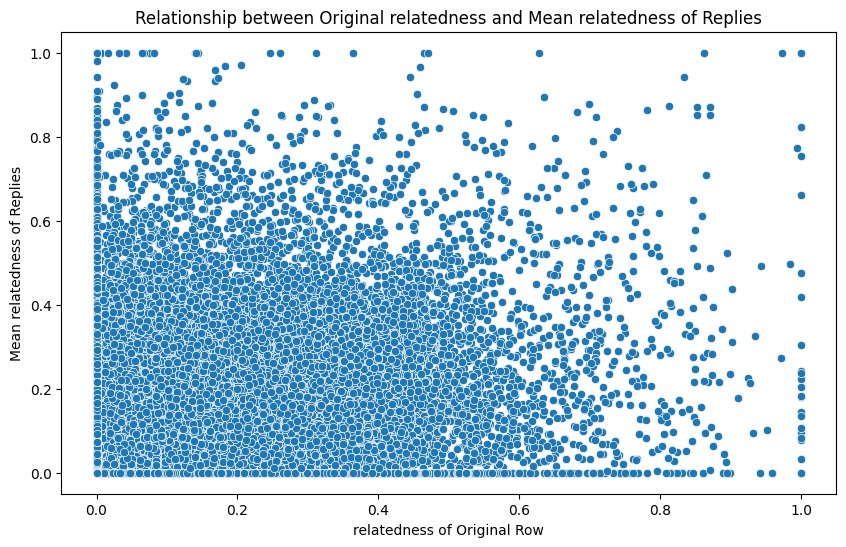

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def mean_column_politeness(df, column_name):
    # Create a new DataFrame with the mean politeness of replies for each original row
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_politeness = replies_df.groupby('reply_to')[column_name].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_politeness.rename('mean_' + column_name), left_on='id', right_index=True, how='left')

    # Plot the relationship between the politeness of the original row and the mean politeness of replies
    non_nan_count = df[(df['mean_' + column_name].notnull()) & (df[column_name].notnull())].shape[0]
    print(f"Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': {non_nan_count}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column_name, y='mean_' + column_name, data=df)
    plt.xlabel(f'{column_name} of Original Row')
    plt.ylabel(f'Mean {column_name} of Replies')
    plt.title(f'Relationship between Original {column_name} and Mean {column_name} of Replies')
    plt.show()

# Assume df is your DataFrame and 'id', 'reply_to', and 'politeness' are columns
mean_column_politeness(df, 'politensess')
mean_column_politeness(df, 'relatedness')


Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 135904


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

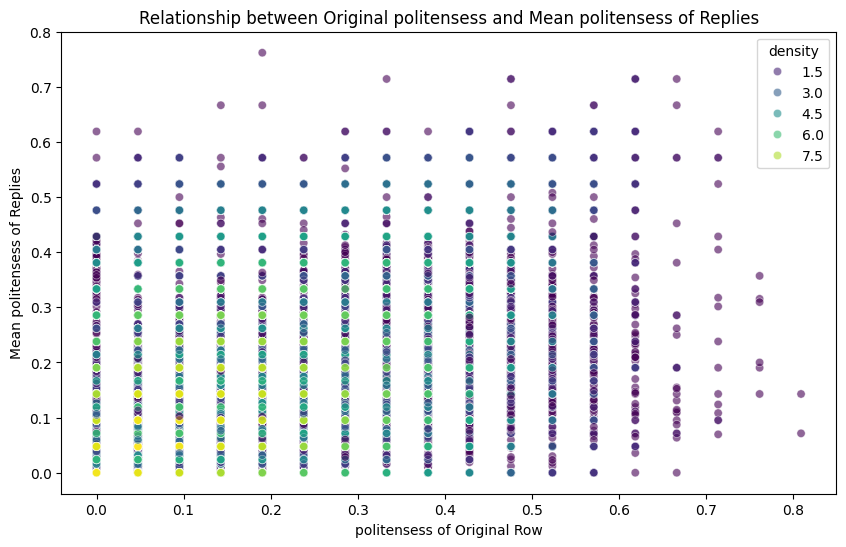

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def mean_column_politeness(df, column_name):
    # Create a new DataFrame with the mean politeness of replies for each original row
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_politeness = replies_df.groupby('reply_to')[column_name].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_politeness.rename('mean_' + column_name), left_on='id', right_index=True, how='left')

    # Calculate density of data points
    df['density'] = np.log1p(df.groupby([column_name, 'mean_' + column_name])[column_name].transform('count'))

    # Plot the relationship between the politeness of the original row and the mean politeness of replies
    non_nan_count = df[(df['mean_' + column_name].notnull()) & (df[column_name].notnull())].shape[0]
    print(f"Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': {non_nan_count}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column_name, y='mean_' + column_name, hue='density', data=df, palette='viridis', alpha=0.6)
    plt.xlabel(f'{column_name} of Original Row')
    plt.ylabel(f'Mean {column_name} of Replies')
    plt.title(f'Relationship between Original {column_name} and Mean {column_name} of Replies')
    plt.colorbar()
    plt.show()

# Assume df is your DataFrame and 'id', 'reply_to', and 'politeness' are columns
mean_column_politeness(df, 'politensess')
mean_column_politeness(df, 'relatedness')


Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 135904


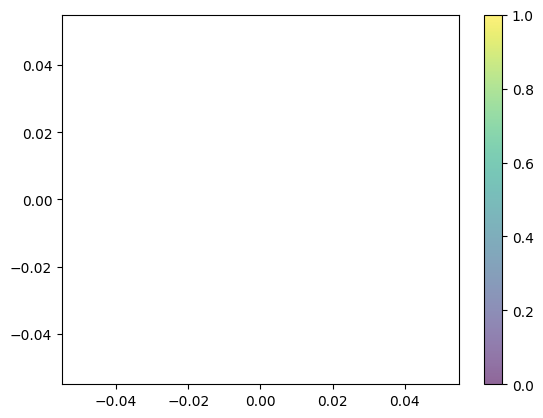

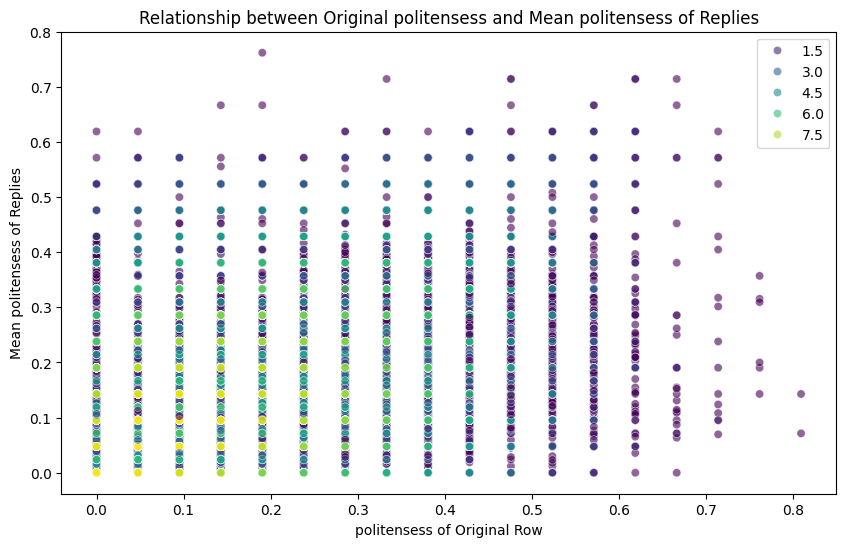

Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 116376


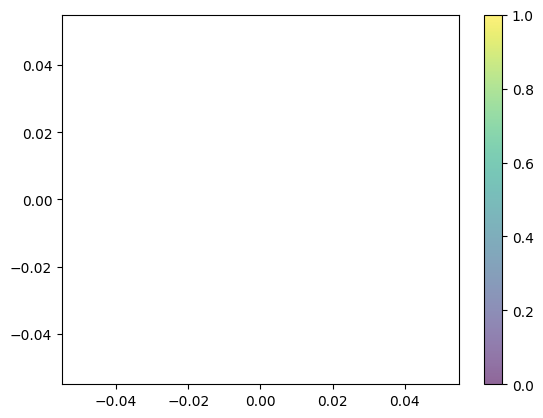

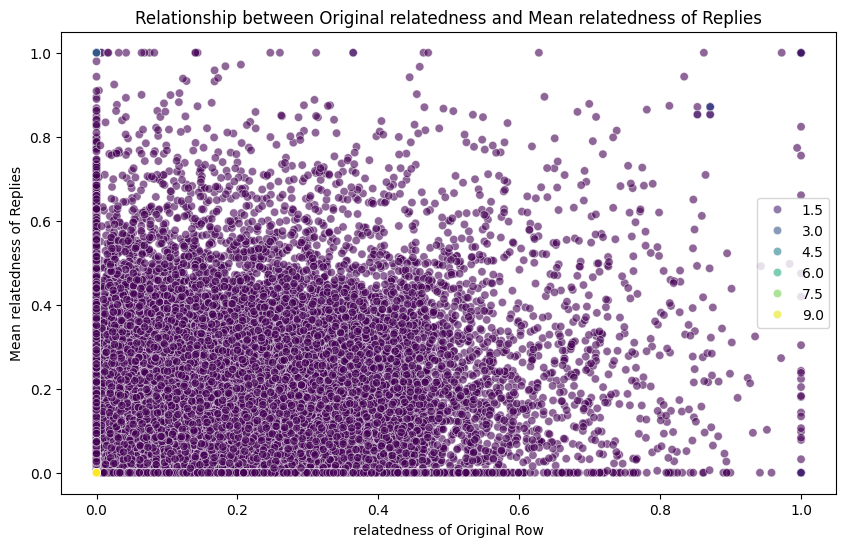

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def mean_column_politeness(df, column_name):
    # Create a new DataFrame with the mean politeness of replies for each original row
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_politeness = replies_df.groupby('reply_to')[column_name].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_politeness.rename('mean_' + column_name), left_on='id', right_index=True, how='left')

    # Calculate density of data points
    df['density'] = np.log1p(df.groupby([column_name, 'mean_' + column_name])[column_name].transform('count'))

    # Create a dummy scatter plot for colorbar mappable
    dummy = plt.scatter([], [], c=[], cmap='viridis', alpha=0.6, label='Density')

    # Plot the relationship between the politeness of the original row and the mean politeness of replies
    non_nan_count = df[(df['mean_' + column_name].notnull()) & (df[column_name].notnull())].shape[0]
    print(f"Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': {non_nan_count}")

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=column_name, y='mean_' + column_name, hue='density', data=df, palette='viridis', alpha=0.6)
    plt.xlabel(f'{column_name} of Original Row')
    plt.ylabel(f'Mean {column_name} of Replies')
    plt.title(f'Relationship between Original {column_name} and Mean {column_name} of Replies')
    plt.colorbar(dummy)
    plt.legend()
    plt.show()

# Assume df is your DataFrame and 'id', 'reply_to', and 'politeness' are columns
mean_column_politeness(df, 'politensess')
mean_column_politeness(df, 'relatedness')


Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 135904


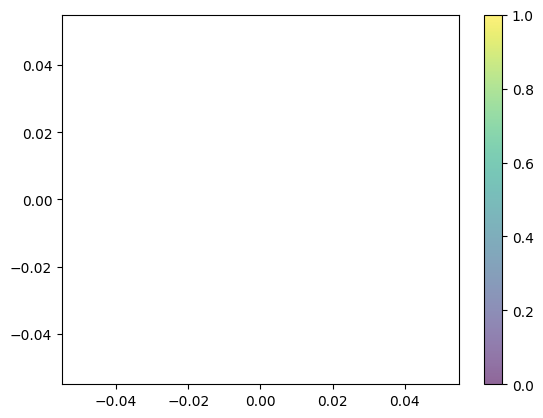

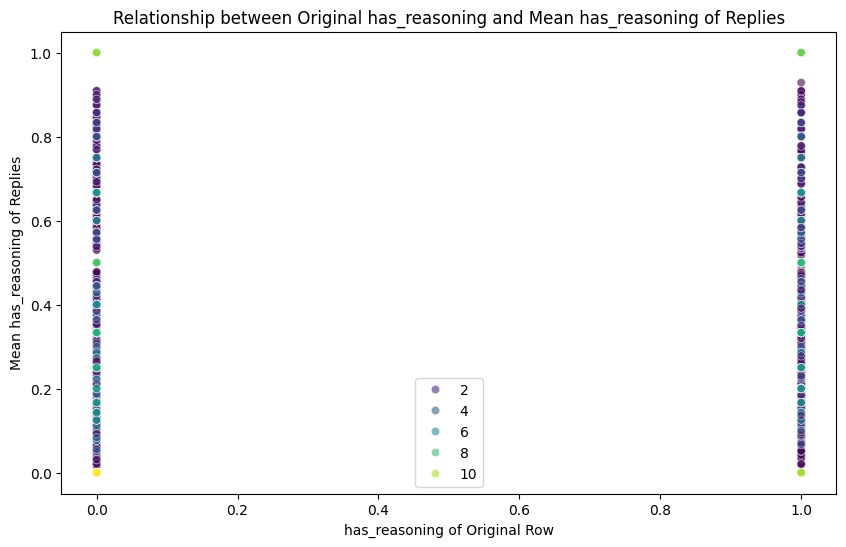

In [ ]:
mean_column_politeness(df, 'has_reasoning')

246332
67074


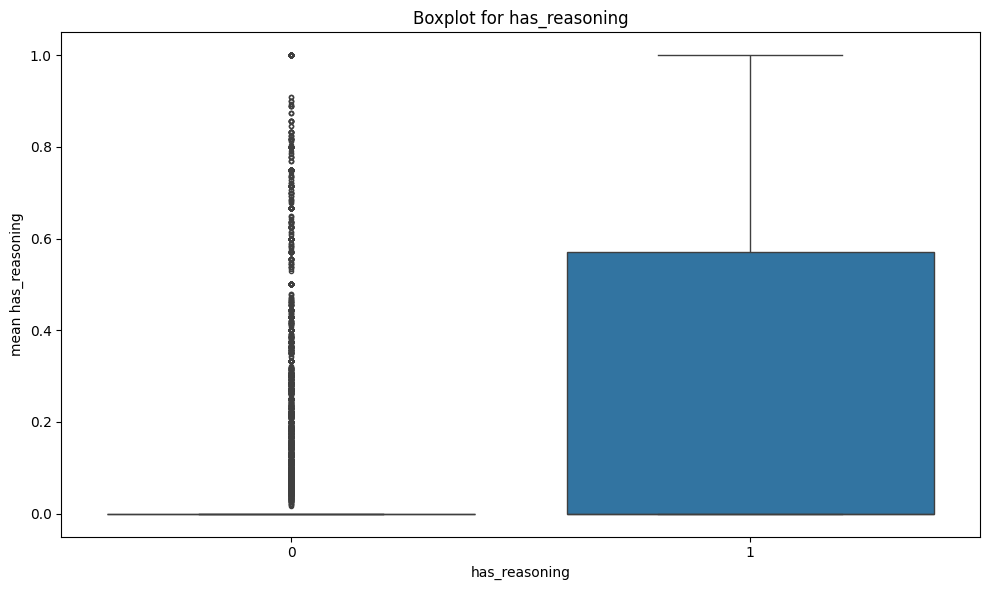

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots_for_categorical_to_mean_numeric(df, column_name):
    # Create separate DataFrames for 'has_reasoning' values of 0 and 1
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_has_reasoning = replies_df.groupby('reply_to')[column_name].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_has_reasoning.rename('mean_' + column_name), left_on='id', right_index=True, how='left')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='has_reasoning', y='mean_' + column_name, data=df, fliersize=3)
    #showfliers=False, fliers are outliers
    plt.title(f'Boxplot for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('mean ' + column_name)
    plt.tight_layout()

    # the number of points in each boxplot
    for i, box in enumerate(df.groupby('has_reasoning')['mean_' + column_name]):
        print(box[1].shape[0])

    plt.show()

# Call the function with your dataframe 'df' and column 'has_reasoning'
boxplots_for_categorical_to_mean_numeric(df, 'has_reasoning')


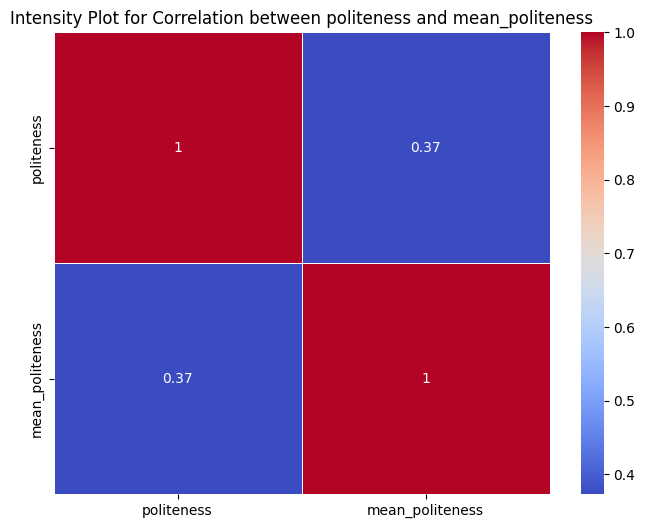

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataframe
replies_df = df.loc[df['reply_to'].notnull()]
mean_politeness = replies_df.groupby('reply_to')['politeness'].mean()

# Merge the original rows with the mean politeness of replies
df = df.merge(mean_politeness.rename('mean_politeness'), left_on='id', right_index=True, how='left')

# Specify the two columns for correlation
column1 = 'politeness'
column2 = 'mean_politeness'

# Calculate the correlation between the two specified columns
correlation = df[column1].corr(df[column2])

# Create a heatmap for the correlation between the two columns
plt.figure(figsize=(8, 6))
sns.heatmap([[1, correlation], [correlation, 1]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=[column1, column2], yticklabels=[column1, column2])
plt.title(f'Intensity Plot for Correlation between {column1} and {column2}')
plt.show()


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def density_for_numeric_to_mean_numeric(df, column_name):
    # Create separate DataFrames for 'has_reasoning' values of 0 and 1
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_column = replies_df.groupby('reply_to')[column_name].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_column.rename('mean_' + column_name), left_on='id', right_index=True, how='left')

    # Create a joint plot with color
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=column_name, y='mean_'+column_name, data=df, kind='kde', cmap='viridis')
    plt.suptitle('Density of Features')
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

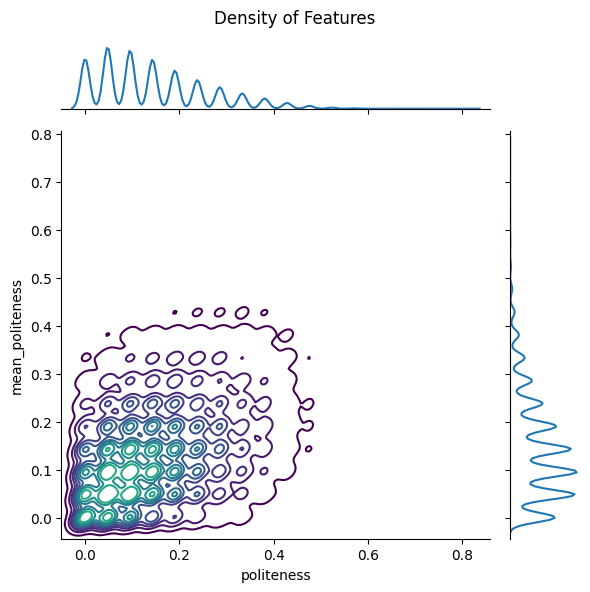

In [10]:
density_for_numeric_to_mean_numeric(df, 'politeness')

<Figure size 800x600 with 0 Axes>

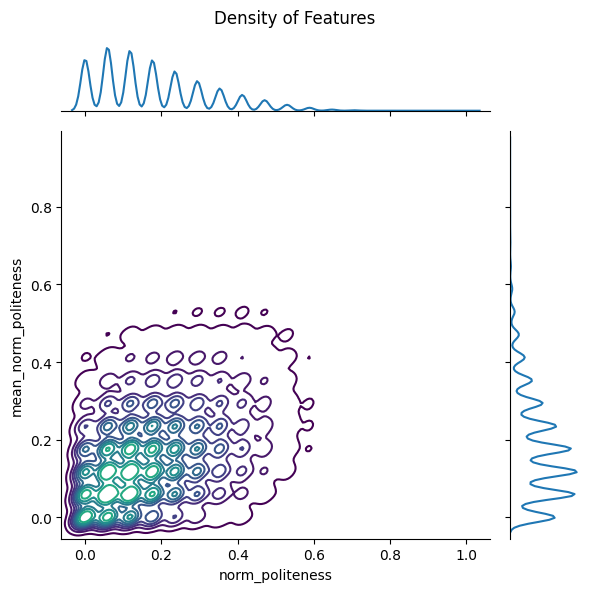

In [11]:
density_for_numeric_to_mean_numeric(df, 'norm_politeness')

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_for_numeric_to_mean_numeric(df, column_name):
  # Create a sample dataframe
  replies_df = df.loc[df['reply_to'].notnull()]
  mean_column = replies_df.groupby('reply_to')[column_name].mean()

  # Merge the original rows with the mean politeness of replies
  df = df.merge(mean_column.rename('mean_'+column_name), left_on='id', right_index=True, how='left')

  # Calculate the correlation between the two specified columns
  correlation = df[column_name].corr(df['mean_'+column_name])

  # Create a heatmap for the correlation between the two columns
  plt.figure(figsize=(8, 6))
  sns.heatmap([[1, correlation], [correlation, 1]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=[column_name, 'mean_'+column_name], yticklabels=[column_name, 'mean_'+column_name])
  plt.title(f'Intensity Plot for Correlation between {column_name} and mean {column_name}')
  plt.show()

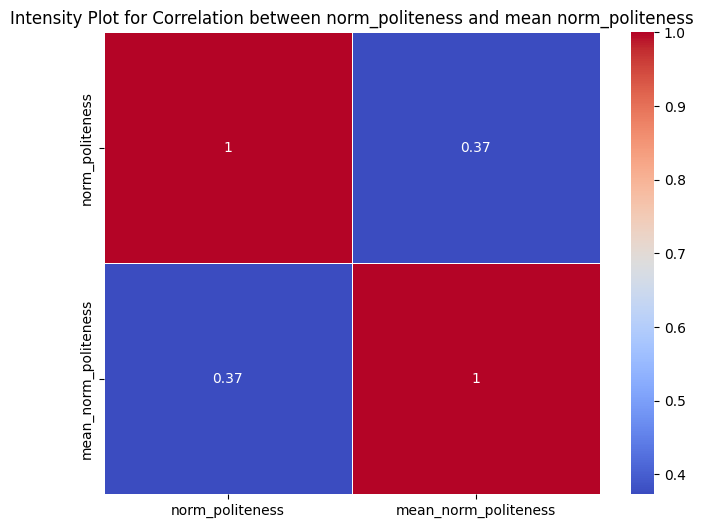

In [18]:
heatmap_for_numeric_to_mean_numeric(df, 'norm_politeness')